## Callback - check point and early stopping

- Callback 함수: 명시적으로 호출되는 게 아니라 나중에 어떤 event 가 발생했을 때 호출되는 함수

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf

- download wine.csv from https://codedragon.tistory.com/9480
  - class 1: red wine, 0: white wine

In [ ]:
df_all = pd.read_csv('wine.csv', header=None)
df = df_all.sample(frac=0.2)  # get only 20% of dataset
df.shape

(1299, 13)

In [ ]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
5510,7.2,0.23,0.82,1.3,0.149,70.0,109.0,0.99304,2.93,0.42,9.2,6,0


In [ ]:
df[12].value_counts()

0    980
1    319
Name: 12, dtype: int64

In [ ]:
dataset = df.values
X, y = dataset[:,0:12], dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장 (epoch 마다)
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True)  # record only when imrpoved

# 테스트 오차가 줄지 않으면 학습 자동 중단 설정 (모니터할 값 저장)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=100) # 좋아지지 않아도 몇 번까지 기다릴것인지


Epoch 00001: val_loss improved from inf to 0.52311, saving model to ./model/01-0.5231.hdf5

Epoch 00002: val_loss improved from 0.52311 to 0.43001, saving model to ./model/02-0.4300.hdf5

Epoch 00003: val_loss improved from 0.43001 to 0.40039, saving model to ./model/03-0.4004.hdf5

Epoch 00004: val_loss improved from 0.40039 to 0.34686, saving model to ./model/04-0.3469.hdf5

Epoch 00005: val_loss improved from 0.34686 to 0.32681, saving model to ./model/05-0.3268.hdf5

Epoch 00006: val_loss improved from 0.32681 to 0.31282, saving model to ./model/06-0.3128.hdf5

Epoch 00007: val_loss improved from 0.31282 to 0.29247, saving model to ./model/07-0.2925.hdf5

Epoch 00008: val_loss improved from 0.29247 to 0.28233, saving model to ./model/08-0.2823.hdf5

Epoch 00009: val_loss improved from 0.28233 to 0.26633, saving model to ./model/09-0.2663.hdf5

Epoch 00010: val_loss improved from 0.26633 to 0.25635, saving model to ./model/10-0.2563.hdf5

Epoch 00011: val_loss improved from 0.25635

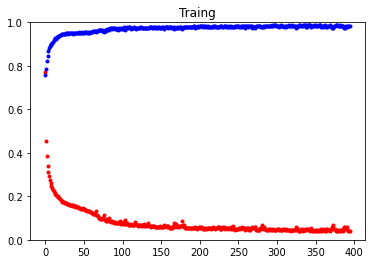

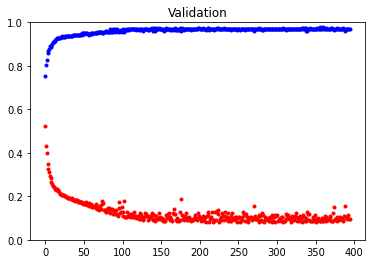

In [ ]:
y_loss, y_acc, y_vloss, y_vacc = [], [], [], []

history = model.fit(X, y, validation_split=0.2, 
                    epochs=2000, batch_size=100, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])
y_loss = history.history['loss']
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
x_len = np.arange(len(y_acc))
plt.ylim(0.,1.)
plt.title("Traing")
plt.plot(x_len, y_loss, "o", c="r", markersize=3)
plt.plot(x_len, y_acc, "o", c="b", markersize=3)
plt.show()
plt.title("Validation")
plt.ylim(0.,1.)
plt.plot(x_len, y_vloss, "o", c="r", markersize=3)
plt.plot(x_len, y_vacc, "o", c="b", markersize=3)
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print("Acuracy: %.4f" %(model.evaluate(X, y)[1]))

41/41 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9823
Acuracy: 0.9823


- 2000 epoch 전에 중간에 중단됨을 알 수 있다.